In [39]:
import matplotlib.pyplot as plt
import yfinance as yf
from pandas_datareader import data as pdr
import pandas as pd
import numpy as np

In [40]:
yf.pdr_override()


In [41]:
df = pdr.get_data_yahoo("SPY", start = "2017-01-01", end = "2024-04-01")

[*********************100%%**********************]  1 of 1 completed


In [42]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,225.039993,225.830002,223.880005,225.240005,199.200668,91366500
2017-01-04,225.619995,226.750000,225.610001,226.580002,200.385712,78744400
2017-01-05,226.270004,226.580002,225.479996,226.399994,200.226501,78379000
2017-01-06,226.529999,227.750000,225.899994,227.210007,200.942856,71559900
2017-01-09,226.910004,227.070007,226.419998,226.460007,200.279602,46939700


# Feature Adjustments

In [45]:
df['MA_12'] = df['Adj Close'].rolling(window = 12).mean()
df['MA_21'] = df['Adj Close'].rolling(window = 21).mean()
df.loc[df['MA_12']>df['MA_21'], "Signal"] = 1
df.loc[df['MA_12']<=df['MA_21'], "Signal"] = 0
df['Signal'] = df['Signal'].shift(1)
df.head(5)

,Open,High,Low,Close,Adj Close,Volume,MA_12,MA_21,Signal
Date,,,,,,,,,
2017-01-03,225.039993,225.830002,223.880005,225.240005,199.200668,91366500,NaN,NaN,NaN
2017-01-04,225.619995,226.750000,225.610001,226.580002,200.385712,78744400,NaN,NaN,NaN
2017-01-05,226.270004,226.580002,225.479996,226.399994,200.226501,78379000,NaN,NaN,NaN
2017-01-06,226.529999,227.750000,225.899994,227.210007,200.942856,71559900,NaN,NaN,NaN
2017-01-09,226.910004,227.070007,226.419998,226.460007,200.279602,46939700,NaN,NaN,NaN


In [46]:
#Add return
df['lrets_bench'] = np.log(df['Adj Close']/df['Adj Close'].shift(1))
df['lrets_prod_bench'] = df['lrets_bench'].cumsum()
df['prod_bench'] = np.exp(df['lrets_prod_bench'])-1

In [47]:
#Add Strategy Returns
df['lrets_strat'] = np.log(df['Open'].shift(-1)/df['Open'])*df['Signal']
df['lrets_prod_strat'] = df['lrets_strat'].cumsum()
df['prod_strat'] = np.exp(df['lrets_prod_strat'])-1
df.tail(3)

,Open,High,Low,Close,Adj Close,Volume,MA_12,MA_21,Signal,lrets_bench,lrets_prod_bench,prod_bench,lrets_strat,lrets_prod_strat,prod_strat
Date,,,,,,,,,,,,,,,
2024-03-26,521.229980,521.580017,518.400024,518.809998,518.809998,65463700,516.122709,512.815985,1.0,-0.001849,0.957225,1.604459,0.000921,0.260207,0.297199
2024-03-27,521.710022,523.210022,519.489990,523.169983,523.169983,82999800,517.245511,513.664087,1.0,0.008369,0.965594,1.626347,0.002871,0.263078,0.300929
2024-03-28,523.210022,524.609985,522.780029,523.070007,523.070007,96294900,517.903069,514.539234,1.0,-0.000191,0.965403,1.625845,NaN,NaN,NaN


In [48]:
df.dropna(inplace = True)

In [50]:
print(len(df))

1799


# Plot Results

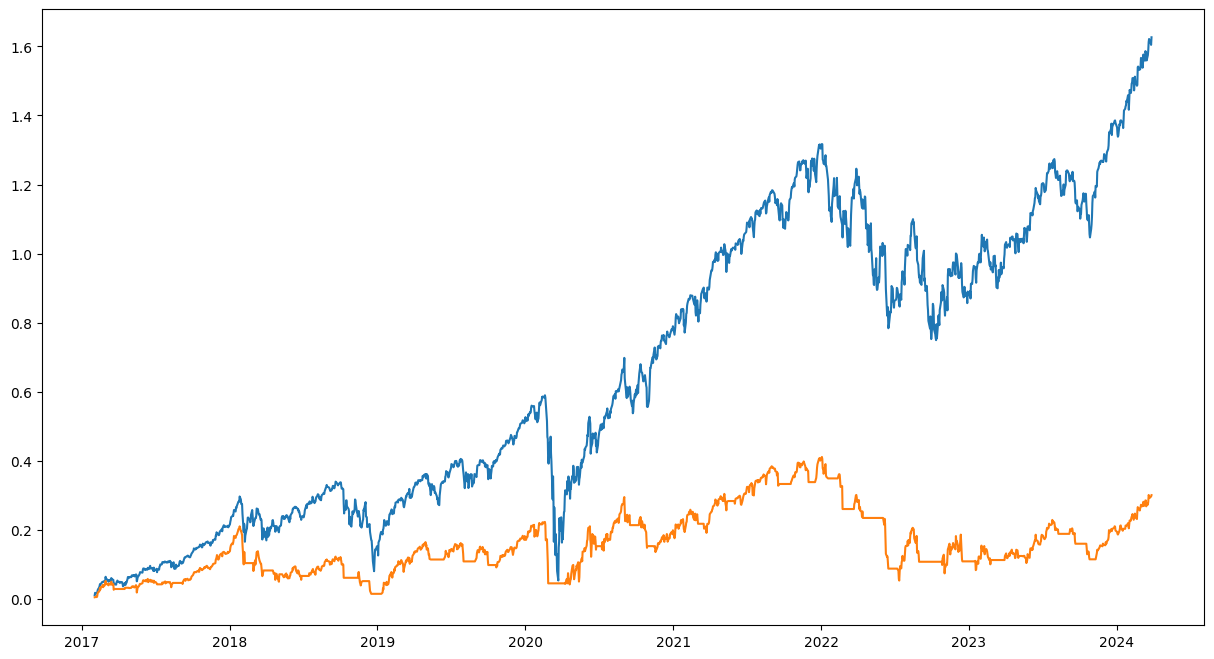

In [52]:
#Show Graph
fig = plt.figure(figsize=(15,8))
plt.plot(df['prod_bench'])
plt.plot(df['prod_strat'])
plt.show()

# Metrics

In [54]:
# Calculate Returns
print("Benchmark Returns: ", df['prod_bench'].iloc[-1])
print("Strategy Returns: ", df['prod_strat'].iloc[-1])


Benchmark Returns:  1.6263465242517885
Strategy Returns:  0.3009286987073625


In [65]:
#Calculate Sharpe

def calculate_sharpe(returns):
    N=255
    rf = 0.01
    SQRTN = np.sqrt(N)
    mean = returns.mean()*N
    sigma = returns.std()*SQRTN
    sharpe = round((mean-rf)/sigma,3)
    return sharpe



In [66]:
#Show Sharpe

bench_sharpe = calculate_sharpe(df['lrets_bench'].values)
strat_sharpe = calculate_sharpe(df['lrets_strat'].values)
print("Benchmark Sharpe: ", bench_sharpe)
print("Strategy Sharpe: ", strat_sharpe)

Benchmark Sharpe:  0.656
Strategy Sharpe:  0.222
